In [16]:
# Now that we know the file was missing before, let's try reading it again from the uploaded file.
# The user uploaded it with the intended graph data.
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import os

# Let's use the correct uploaded file path:
file_path = "../BA-200.txt"

# === Load graph ===
G = nx.read_adjlist(file_path, nodetype=int)
A = nx.to_numpy_array(G)
N = A.shape[0]

# === Parameters ===
beta = 0.08
mu = 0.1
tau = beta / mu

# === Compute steady state only for this τ
def compute_y_star(A, tau_val, y0=None, tol=1e-6, max_iter=500):
    N = A.shape[0]
    if y0 is None:
        y = np.ones(N) * 100
    else:
        y = y0.copy()

    for _ in range(max_iter):
        y_new = tau_val * A.dot(y / (1 + y))
        if np.linalg.norm(y_new - y) < tol:
            break
        y = y_new
    return y

# Compute steady state
y_star = compute_y_star(A, tau)
p_star = y_star / (1 + y_star)
avg_steady_state = np.mean(p_star)
avg_steady_state


np.float64(0.6387214908017061)

C:\Users\Matin\AppData\Local\Temp\ipykernel_10792\3075759425.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_new[i] = tau * np.sum(A[i, j] * y[j] / (1 + y[j]) for j in range(N))
C:\Users\Matin\AppData\Local\Temp\ipykernel_10792\3075759425.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  y_new[i] = tau * np.sum(A[i, j] * y[j] / (1 + y[j]) for j in range(N))


1) τ_c = (0.1197674779701104+0j)

2) Fill in the table:
τ		Average Probability
0.1198+0.0000j		0.000141
0.2395+0.0000j		0.200591
0.3593+0.0000j		0.359598
0.4791+0.0000j		0.469953
0.5988+0.0000j		0.548570
0.7186+0.0000j		0.606971
0.8384+0.0000j		0.651968
0.9581+0.0000j		0.687680
1.0779+0.0000j		0.716708
1.1977+0.0000j		0.740772


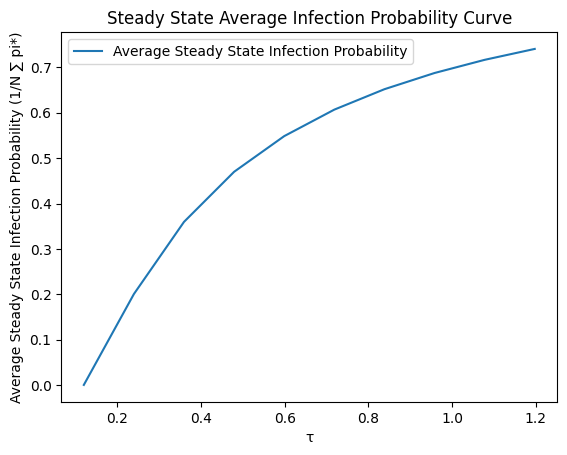

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_steady_state_probabilities(A, tau):
    N = len(A)
    y = np.ones(N) * 100  # Initial values for y(i, tau, k+1)
    # y /= y + 1  # Initial values for p(i, tau, k+1)

    for k in range(100000):  # Maximum number of iterations
        y_new = np.zeros(N)
        for i in range(N):
            y_new[i] = tau * np.sum(A[i, j] * y[j] / (1 + y[j]) for j in range(N))

        if np.allclose(y, y_new, rtol=1e-6, atol=1e-6):
            break  # Convergence criterion

        y = y_new

    p = y / (1 + y)
    return p

file_path = "../BA-200.txt"
G = nx.read_adjlist(file_path, nodetype=int)
A = nx.to_numpy_array(G, dtype=int)

eigenvalues, _ = np.linalg.eig(A)
lambda_max_A = np.max(eigenvalues)
tau_c = 1 / lambda_max_A


# steady state probabilities for different values of τ
tau_values = [tau_c * i for i in range(1, 11)]  # τ_c to 10τ_c

avg_probabilities = []

for tau in tau_values:
    p = calculate_steady_state_probabilities(A, tau)
    avg_prob = np.mean(p)
    avg_probabilities.append(avg_prob)

print("1) τ_c =", tau_c)
print("\n2) Fill in the table:")

print("τ\t\tAverage Probability")
for tau, avg_prob in zip(tau_values, avg_probabilities):
    print(f"{tau:.4f}\t\t{avg_prob:.6f}")

plt.plot(tau_values, avg_probabilities, label='Average Steady State Infection Probability')
plt.xlabel('τ')
plt.ylabel('Average Steady State Infection Probability (1/N ∑ pi*)')
plt.title('Steady State Average Infection Probability Curve')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import networkx as nx

def calculate_steady_state_probabilities(A, tau, max_iter=100000, tol=1e-6):
    N = len(A)
    y = np.ones(N) * 100  # Initial guess

    for _ in range(max_iter):
        y_new = np.array([
            tau * np.sum(A[i, j] * y[j] / (1 + y[j]) for j in range(N))
            for i in range(N)
        ])
        if np.allclose(y, y_new, rtol=tol, atol=tol):
            break
        y = y_new

    p = y / (1 + y)
    return p

# === Load your graph ===
file_path = "../BA-200.txt"  # Adjust the path if needed
G = nx.read_adjlist(file_path, nodetype=int)
A = nx.to_numpy_array(G, dtype=float)

# === Parameters ===
beta = 0.08
mu = 0.1
tau = beta / mu  # This is your τ

# === Compute and print ===
lambda_max = max(np.linalg.eigvals(A)).real
tau_c = 1 / lambda_max

print(f"λ₁ (max eigenvalue) = {lambda_max:.4f}")
print(f"τ = β/μ = {tau:.4f}")
print(f"τ_c = 1/λ₁ = {tau_c:.4f}")
print("Above threshold?" , "Yes" if tau > tau_c else "No")

# === Steady state infection probability
p = calculate_steady_state_probabilities(A, tau)
avg_p = np.mean(p)

print(f"\nAverage steady-state infection probability: {avg_p:.6f}")


λ₁ (max eigenvalue) = 8.3495
τ = β/μ = 0.8000
τ_c = 1/λ₁ = 0.1198
Above threshold? Yes

Average steady-state infection probability: 0.638722


C:\Users\Matin\AppData\Local\Temp\ipykernel_10792\1097634202.py:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  tau * np.sum(A[i, j] * y[j] / (1 + y[j]) for j in range(N))


In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
adjlist = 'BA-200'
beta = 0.08    # Infection rate
mu = 0.1       # Recovery rate
n_runs = 100    # Number of SIS runs
n_steps = 200  # Number of time steps per run
initial_infected_fraction = 0.05  # Fraction of initially infected nodes

# Load graph
static_graph = nx.read_adjlist(f"../{adjlist}.txt", nodetype=int)
n_nodes = static_graph.number_of_nodes()

# Function to run one SIS simulation
def run_sis(G, beta, mu, steps, initial_fraction):
    # Initialize all nodes as susceptible (0), infected (1)
    states = {node: 0 for node in G.nodes()}
    initial_infected = random.sample(list(G.nodes()), int(initial_fraction * n_nodes))
    for node in initial_infected:
        states[node] = 1

    infected_counts = []

    for _ in range(steps):
        new_states = states.copy()
        for node in G.nodes():
            if states[node] == 1:
                # Recovery
                if random.random() < mu:
                    new_states[node] = 0
            else:
                # Infection from neighbors
                neighbors = list(G.neighbors(node))
                infected_neighbors = sum(states[neighbor] for neighbor in neighbors)
                if infected_neighbors > 0:
                    if random.random() < 1 - (1 - beta) ** infected_neighbors:
                        new_states[node] = 1
        states = new_states
        infected_counts.append(sum(states.values()) / n_nodes)  # Fraction infected

    return infected_counts

# Run multiple simulations
all_curves = []
for _ in range(n_runs):
    curve = run_sis(static_graph, beta, mu, n_steps, initial_infected_fraction)
    all_curves.append(curve)

# Compute mean infection curve
mean_curve = np.mean(all_curves, axis=0)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(mean_curve, label=f"Mean Infection Curve ({n_runs} runs)")
plt.xlabel("Time Step")
plt.ylabel("Fraction Infected")
plt.title("SIS Dynamics on BA-200 Network")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sis_curve.png")  # <-- Save instead of show
print("Plot saved as 'sis_curve.png'")

Plot saved as 'sis_curve.png'
